# Modelos de Regresión Lineal
## Modelo con datos simulados
* y = a+bx
* x : 100 valores distribuidos según una $N(1.5,2.5)$
* Ye : 3 + 1.5 x (La estimación) 
* e (residuo) estará distribuida según una $N(0,0.8)$

In [1]:
import pandas as pd
import numpy as np

In [2]:
x = 1.5 + 2.5*np.random.randn(100)

In [3]:
res = 0 + 0.8*np.random.randn(100) # residuo

In [4]:
y_pred = 3 + 1.5*x

In [5]:
y_act = 3 + 1.5*x + res

In [6]:
x_list = x.tolist()
y_pred_list = y_pred.tolist()
y_act_list = y_act.tolist()

In [7]:
data = pd.DataFrame(
    {
    'x':x_list,
    'y_actual': y_act_list,
    'y_prediccion': y_pred_list
}
)

In [8]:
data.head()

,x,y_actual,y_prediccion
0,3.978889,9.974239,8.968333
1,2.784391,7.251456,7.176586
2,-1.017691,1.207088,1.473463
3,1.771929,4.773159,5.657894
4,-4.349108,-3.991245,-3.523662


In [9]:
import matplotlib.pyplot as plt

In [32]:
y_mean = [np.mean(y_act) for i in range(1,len(x_list)+1)]

Text(0.5, 1.0, 'Valor Actual vs predicción')

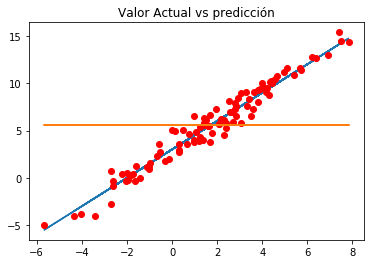

In [11]:
%matplotlib inline
plt.plot(x,y_pred)
plt.plot(x,y_act,'ro')
plt.plot(x,y_mean)
plt.title('Valor Actual vs predicción')

#### ¿Cómo es la predicción buena?
* SST = SSD +SSR
* SST: Variabilidad de los datos con respecto a su media
* SSD: Diferencia entre los datos originales y las predicciones que el modelo no es capaz de explicar (errores que deberian seguir una distribución normal)
* SSR: Diferencia entre la región del valor medio que el modelo busca explicar
* $R^2$ =SSR/SST, coeficiente de determinación entre 0 y 1

In [12]:
data['SSR'] = (data['y_prediccion']-np.mean(y_act))**2
data['SSD'] = (data['y_prediccion']-data['y_actual'])**2
data['SST']= (data['y_actual']-np.mean(y_act))**2

In [13]:
data.head()

,x,y_actual,y_prediccion,SSR,SSD,SST
0,3.978889,9.974239,8.968333,11.471800,1.011847,19.297665
1,2.784391,7.251456,7.176586,2.544846,0.005605,2.789325
2,-1.017691,1.207088,1.473463,16.874560,0.070956,19.133982
3,1.771929,4.773159,5.657894,0.005862,0.782756,0.653138
4,-4.349108,-3.991245,-3.523662,82.900847,0.218634,91.634158


In [14]:
SSR = sum(data['SSR'])
SSD = sum(data['SSD'])
SST = sum(data['SST'])

In [15]:
SSR

1723.851814153154

In [16]:
SSD

76.95201735315725

In [17]:
SST

1863.3158763620634

In [18]:
SSR+SSD

1800.8038315063113

In [19]:
R2 = SSR/SST
R2

0.9251527537664741

(array([ 4.,  4.,  8., 19., 13., 17., 17., 10.,  2.,  6.]),
 array([-2.13016375, -1.72403522, -1.31790669, -0.91177817, -0.50564964,
        -0.09952111,  0.30660742,  0.71273594,  1.11886447,  1.524993  ,
         1.93112153]),
 <a list of 10 Patch objects>)

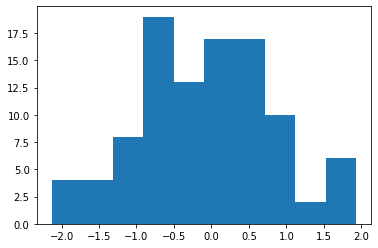

In [20]:
plt.hist(data['y_prediccion']-data['y_actual'])

## Obteniendo la recta de regresión
* Y = a +bx
* b = $\frac{\sum_i^n (x_i - x_m)(y_i - y_m)}{\sum_i^n (x_i- x_m)^2}$
* a = $y_m - bx_m$

In [21]:
x_mean = np.mean(data['x'])
y_mean = np.mean(data['y_actual'])
x_mean,y_mean

(1.6823730164338795, 5.581328491161139)

In [23]:
data['beta_n'] = (data['x']-x_mean)*(data['y_actual']-y_mean)
data['beta_d']=(data['x']-x_mean)**2

In [24]:
beta = sum(data['beta_n'])/sum(data['beta_d'])

In [25]:
alpha = y_mean - beta*x_mean

In [26]:
alpha,beta #alpha = 3, beta = 1.5 (buena aproximación)

(3.0115155448596087, 1.5274929645202908)

El modelo obtenido por regresión es:

y = alpha+ beta*x

In [27]:
data['y_model'] = alpha+beta*data['x'] #La aproximación de nuestro modelo

In [28]:
data.head()

,x,y_actual,y_prediccion,SSR,SSD,SST,beta_n,beta_d,y_model
0,3.978889,9.974239,8.968333,11.471800,1.011847,19.297665,10.088389,5.273984,9.089240
1,2.784391,7.251456,7.176586,2.544846,0.005605,2.789325,1.840510,1.214443,7.264653
2,-1.017691,1.207088,1.473463,16.874560,0.070956,19.133982,11.810732,7.290348,1.456999
3,1.771929,4.773159,5.657894,0.005862,0.782756,0.653138,-0.072377,0.008020,5.718125
4,-4.349108,-3.991245,-3.523662,82.900847,0.218634,91.634158,57.736792,36.378761,-3.631716


In [29]:
SSR = sum((data['y_model']-y_mean)**2)
SSD = sum((data['y_model']-data['y_actual'])**2)
SST = sum((data['y_actual']-np.mean(y_act))**2)

In [30]:
SSR,SSD,SST

(1787.2765815679695, 76.0392947940975, 1863.3158763620634)

In [31]:
R2 = SSR/SST
R2

0.9591914093800602

Text(0.5, 1.0, 'Valor Actual vs predicción')

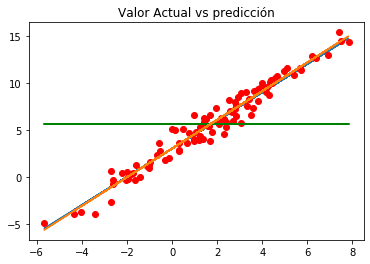

In [33]:
%matplotlib inline
plt.plot(data['x'],data['y_prediccion'])
plt.plot(data['x'],data['y_actual'],'ro')
plt.plot(data['x'],y_mean,'g')
plt.plot(data['x'],data['y_model'])
plt.title('Valor Actual vs predicción') #El modelo y la predicción son bastante parecidos

### Error estándar de los residuos (RSE)

In [35]:
rse = np.sqrt(SSD/(len(data)-2)) #Cuanto menor sea, mucho mejor es el modelo
rse

0.8808582016240423

In [36]:
np.mean(data['y_actual']) #Error de 0.88 sobre el 5.58

5.581328491161139

In [37]:
rse/np.mean(data['y_actual'])  #15% de error

0.1578223182919643